# 🔄 Método del Codo con KMeans

Con este notebook podrás comprender cómo aplicar el método del codo para determinar el número óptimo de clústeres al realizar agrupamiento con KMeans. Utilizaremos un conjunto de datos de Kaggle: **Mall Customer Segmentation Data**.

## ¿Qué es el Método del Codo?

El método del codo es una técnica visual utilizada para determinar el número óptimo de clústeres mediante el algoritmo K-Means. Su **objetivo** es encontrar el equilibrio entre la cantidad de clústeres y la compactación de los datos, es decir, encontrar el punto en el cual al agregar más clústeres, se deja de proporcionar una mejora significativa en la agrupación de diferentes grupos. 

Para ello, se ejecuta el algoritmo K-Means para diferentes valores de 𝑘 (número de clústeres), generalmente desde k = 1 hasta un valor razonable y calcular la suma de las distancias al cuadrado de cada punto respecto a su centroide. Se generarán resultados para crear una gráfica con los valores de k en el eje x y la suma de las distancias al cuadrado en el eje y. En esta gráfica se busca el punto donde se produce un cambio brusco en la disminución de la suma de las distancias al cuadrado. Punto en el que la curva muestra la forma de un codo. El número óptimo de clústeres corresponde a este punto.

## 🎯 Objetivos

- Importar y explorar datos de una fuente en línea.
- Preprocesar los datos.
- Implementar el método del codo para encontrar el número óptimo de clústeres.
- Aplicar KMeans y visualizar los resultados.
- Interpretar los resultados.

## Ventajas

✅ Fácil de entender e implementar.

✅ Visualización clara para decidir el número de clústeres.

## Desventajas

❗ Puede ser difícil identificar el codo visualmente si la curva es muy suave.

❗ No siempre funciona bien con datos complejos o de alta dimensionalidad.



# 📝 Pasos para Aplicar el Método del Codo

1. Ejecutar K-Means para diferentes valores de k (número de clústeres).

2. Calcular la Suma de los Errores Cuadráticos (SSE):

$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

### Donde:

- $C_i$ = Conjunto de puntos en el clúster $i$
- $\mu_i$ = Centroide del clúster $i$

3. Graficar SSE vs. k y observar el punto donde la disminución se vuelve menos pronunciada (el codo).

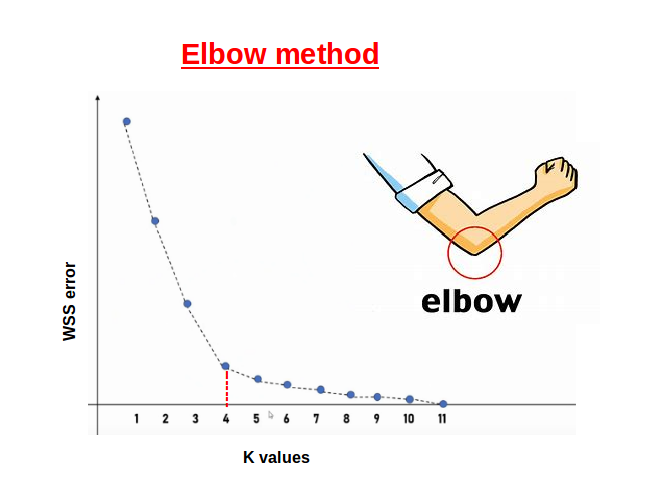


## EJERCICIO CASO PRÁCTICO

In [4]:

# Instalación de bibliotecas necesarias (si es necesario)
!pip install pandas matplotlib scikit-learn
!pip install seaborn
!pip install ipywidgets


In [8]:

# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Configuración para gráficos más estéticos
sns.set(style="whitegrid")



## Cargar el conjunto de datos
Descargaremos el conjunto de datos "Mall Customer Segmentation Data".


In [9]:

# Cargar datos directamente desde una URL
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
data = pd.read_csv(url)

# Mostrar las primeras 5 filas del conjunto de datos
# Esto nos ayuda a entender cómo están organizados los datos
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



## Exploración inicial de los datos (EDA)
Revisaremos la estructura del conjunto de datos para entender qué columnas son relevantes para el análisis.


In [10]:

# Información general sobre el conjunto de datos
data.info()

# Estadísticas descriptivas básicas como media, desviación estándar, mínimos y máximos
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



## Selección de características
Para este ejemplo, utilizaremos las columnas `Annual Income (k$)` y `Spending Score (1-100)` para realizar la agrupación.


In [11]:

# Selección de características relevantes para agrupamiento de clientes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Mostrar las primeras filas de las características seleccionadas
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40



## Método del Codo

Encontrar el número óptimo de clústeres al observar la "inercia" o suma de distancias cuadradas internas.


C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

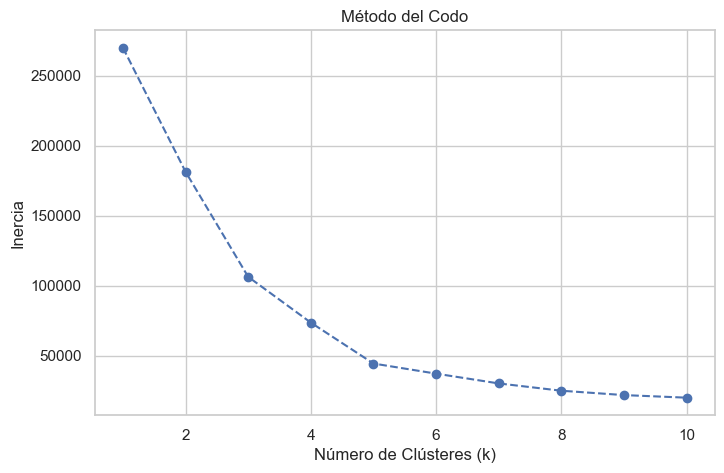

In [16]:

# Calcular el método del codo

# Crear una lista vacía para almacenar la inercia de cada valor de k
inertia = [] 
# Definir rango de valores a probar, en este caso del 1 al 10
range_k = range(1, 11) 

# Iterar sobre cada valor de k
for k in range_k:
    # Crear un modelo con k clústeres (rango) y una semilla aleatoria para asegurar reproducibilidad
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar modelo a datos
    kmeans.fit(X)
    
     # Inercia mide la suma de las distancias cuadradas de cada punto al centroide de su clúster
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
# Se ajusta a un tamaño y se define eje x, eje y, leyendas, marcadores circulares, estilo de línea, nombre de etiquetas y título
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()


### Rango de 1 a 10 para el número de clústeres (k)

El rango de 1 a 10 para el número de clústeres (k) en este caso se eligió por varias razones prácticas:

1. Experimentación: Un rango entre 1 y 10 es comúnmente utilizado cuando se experimenta con el algoritmo K-Means, ya que no se sabe de antemano cuál es el número óptimo de clústeres. Este rango es suficientemente amplio para explorar las posibilidades de segmentación sin hacerlo demasiado grande.

2. Balance: Elegir un rango muy grande podría hacer que el proceso de ejecución sea más largo, y para muchos conjuntos de datos, un número de clústeres superior a 10 podría no añadir un valor significativo en términos de segmentación. En general, los datos suelen ser bien representados con entre 3 a 10 clústeres.

3. Visibilidad: El rango de 1 a 10 es conveniente para observar el "codo" en la gráfica, donde el cambio en la disminución de la inercia (distancia interna del clúster) ya no es tan significativo. Esto facilita la identificación visual del número óptimo de clústeres.


## Aplicar KMeans con el número óptimo de clústeres

Como se puede apreciar en el gráfico anterior, el número óptimo de clústeres esta entre 5 y 6, ya que entre esos valores, se observa el primer quiebre de la curva anterior (el gráfico del método del codo) ya que es donde la disminución de la inercia se vuelve menos pronunciada.

Con el siguiente código, de forma visual e interactiva, se puede comprobar que el valor óptimo es 5.


In [14]:
import matplotlib.pyplot as plt #librerías para graficar
import seaborn as sns # gráficos más estilizados
from sklearn.cluster import KMeans # algoritmo K-Means
import ipywidgets as widgets #interfaces interactivas
from IPython.display import display, clear_output #mosrtar y limpiar

# Crear un slider para seleccionar el número de clústeres
k_slider = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Clústeres:', continuous_update=False)

# Crear un área de salida para el gráfico
output = widgets.Output()

# Función para actualizar el gráfico
def actualizar_grafico(change):
    # Mostrar el valor de k en un slider
    k = change['new']
    # Crear modelo KMeans con el valor de k
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Ajustar modelo y predecir clústeres
    data['Cluster'] = kmeans.fit_predict(X)

    # Mostrar gráfico en área de salida, limpiar y crear gráfica
    with output:
        clear_output(wait=True)
        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            x='Annual Income (k$)',
            y='Spending Score (1-100)',
            # Colorear puntos según Cluster
            hue='Cluster',
            data=data,
            palette='Set2',
            s=100 #Tamaño de puntos
        )
        plt.title(f'Agrupación de Clientes (KMeans) con {k} Clústeres')
        plt.show()

# Conectar el slider con la función de actualización
k_slider.observe(actualizar_grafico, names='value')

# Mostrar el slider y el área de salida en una disposición vertical
display(widgets.VBox([k_slider, output]))

# Generar el gráfico inicial
actualizar_grafico({'new': k_slider.value})


C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\pmora\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



## Conclusiones y Recomendaciones

#### ¡Hemos aplicado con éxito el método del codo!

🔑 Recuerda: El método del codo se utiliza para identificar el número óptimo de clústeres 📊 mediante la visualización de la inercia (la suma de las distancias al cuadrado de cada punto respecto a su centroide). Al graficar la inercia en función de k (número de clústeres), buscamos el punto donde la disminución de la inercia comienza a ser menos pronunciada, formando una curva en forma de "codo".

En este caso, al ajustar el número de clústeres entre 1 y 10, se observa un codo claro en el gráfico alrededor de k=5. Esto sugiere que 5 es un número apropiado de clústeres para segmentar a los clientes de manera efectiva. Esto significa que 5 es el punto donde añadir más clústeres no mejora significativamente la segmentación. Es importante recordar que el número exacto de clústeres puede variar según el contexto o el tipo de análisis.

El modelo K-Means ayuda a agrupar a los clientes según sus características, como el ingreso anual 💵 y la puntuación de gasto 💳. Al segmentar los clientes en clústeres, podemos identificar patrones o grupos de clientes con características similares, lo que puede ser útil para estrategias de marketing personalizadas o para mejorar la atención al cliente 🤝.

Aunque el método del codo es útil para determinar el número de clústeres, en algunos casos el "codo" puede ser poco claro. En ese caso, puede ser útil combinar este método con otras técnicas, como la validación cruzada o el análisis de la estabilidad de los clústeres.

Si es necesario, se puede ampliar el rango de k para explorar un número mayor de clústeres (por ejemplo, de 1 a 15) si se piensa que 10 valores no son suficientes para encontrar un patrón claro.

Después de identificar el número óptimo de clústeres, es recomendable revisar la calidad de la segmentación, observando cómo se distribuyen los clientes dentro de los clústeres y si los grupos resultantes son coherentes con lo que se espera o tiene sentido desde el punto de vista del negocio 💼.